In [168]:
from ilbal.obia import data_preparation as dp
import numpy as np
import rasterio
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.future import graph
import networkx as nx
import matplotlib.pyplot as plt

In [169]:
filename = "/home/nate/Documents/Research/Guatemala/training_data/training_new_IMG_3833.tif"

In [233]:
#felz_params = {'scale': 100.0, 'sigma': 2, 'min_size': 5000}
felz_params = {'scale': 50.0, 'sigma': 2}
slic_params = {'compactness': 1, 'n_segments': 500, 'convert2lab': True, 'slic_zero': False}
quickshift_params = {}

In [234]:
src = rasterio.open(filename)
#print("CRS: " + str(src.crs) + "\n\nShape: " + str(src.shape) + "\n\nBands: " + str(src.count))
#print("Height (numRows): " + str(src.height) + ", Width (numCols): " + str(src.width))

In [235]:
# Segment the image.
rout = dp.segmentation(model=felzenszwalb, params=felz_params, src=src,
                       modal_radius=3)
print("rout Shape: " + str(rout.shape))

vout = dp.vectorize(image=rout, transform=src.transform)
vout.crs = src.crs
print(vout.crs)
vout.to_file("output/original_segs.shp")

/home/nate/anaconda3/envs/geo3/lib/python3.6/site-packages/skimage/util/dtype.py:126: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/nate/anaconda3/envs/geo3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from int16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


rout Shape: (1, 1556, 1086)
+ellps=WGS84 +k=0.9998 +lat_0=0 +lon_0=-90.5 +no_defs +proj=tmerc +units=m +x_0=500000 +y_0=0


In [186]:
# Segment the image.
rout = dp.segmentation(model=slic, params=slic_params, src=src,
                       modal_radius=3)

/home/nate/anaconda3/envs/geo3/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
/home/nate/anaconda3/envs/geo3/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
/home/nate/anaconda3/envs/geo3/lib/python3.6/site-packages/skimage/segmentation/slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprec

In [172]:
# Segment the image.
rout = dp.segmentation(model=quickshift, params=quickshift_params, src=src,
                       modal_radius=3)

/home/nate/anaconda3/envs/geo3/lib/python3.6/site-packages/skimage/util/dtype.py:126: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/nate/anaconda3/envs/geo3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from int16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [236]:
print("rout Shape: " + str(rout.shape))

vout = dp.vectorize(image=rout, transform=src.transform)
vout.crs = src.crs
print(vout.crs)
vout.to_file("output/original_segs.shp")

rout Shape: (1, 1556, 1086)
+ellps=WGS84 +k=0.9998 +lat_0=0 +lon_0=-90.5 +no_defs +proj=tmerc +units=m +x_0=500000 +y_0=0


In [237]:
# Region Agency Graph to merge segments
orig = dp.bsq_to_bip(src.read([1, 2, 3], masked=True))
labels = (dp.bsq_to_bip(rout))[:, :, 0]

In [238]:
np.max(labels)

314

In [239]:
print("Original: " + str(orig.shape) + ", labels: " + str(labels.shape))

Original: (1556, 1086, 3), labels: (1556, 1086)


In [265]:
rag = graph.rag_mean_color(orig, labels)

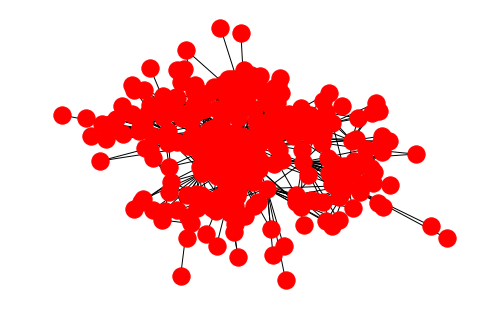

In [266]:
nx.draw(rag)

In [267]:
rout_cut_normalized = graph.cut_normalized(labels, rag)
#rout_threshold = graph.cut_threshold(labels, rag, 10)

In [268]:
rout_cut_normalized.shape

(1556, 1086)

In [269]:
#plt.hist(rout2)  # arguments are passed to np.histogram
#plt.title("Regions distribution")
#plt.show()

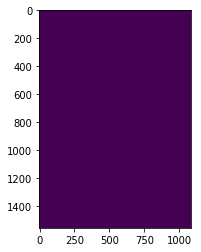

In [270]:
plt.imshow(rout_cut_normalized)

In [260]:
np.max(rout_cut_normalized)

83

In [261]:
rout3 = dp.bip_to_bsq(rout_cut_normalized[:, :, np.newaxis])
rout3.shape

(1, 1556, 1086)

In [262]:
np.max(rout3)

83

In [263]:
# Vectorize the RAG segments
vout = dp.vectorize(image=rout3, transform=src.transform)
vout.crs = src.crs
print(vout.crs)
vout.to_file("output/working.shp")

+ellps=WGS84 +k=0.9998 +lat_0=0 +lon_0=-90.5 +no_defs +proj=tmerc +units=m +x_0=500000 +y_0=0
